Name: Oğuz Kaan Öselmiş

ID: 201101030

Course: BIL470

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from dt import DecisionTreeClassifier

# 1 - Exploratory Data Analysis (EDA) for IRIS

## Data Reading

In [275]:
#read the csv
df = pd.read_csv('Iris.csv')

#to see data and column, row count
print('(row,columns):',df.shape)
print('Attribute types:\n',df.dtypes)

(row,columns): (150, 6)
Attribute types:
 Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [276]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [277]:
# What are the "Species" values
print("Species : ",df['Species'].unique())

Species :  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Data Preparation

In [278]:
# Remove ID from columns
df.drop('Id',axis=1,inplace=True)

In [279]:
#Is there any missing values?
print("Count of Missing Values:")
df.isna().sum()

Count of Missing Values:


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [280]:
# Replace 
# Iris-setosa with 0, 
# Iris-versicolor with 1, 
# Iris-virginica with 2

dictionary = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica": 2,
}

df['Species'] = df['Species'].map(dictionary)
print("After replace")
print("Species : ",df['Species'].unique())

After replace
Species :  [0 1 2]


In [281]:
# Is there any duplicated rows?
print("Duplicated Rows: ")
df.loc[df.duplicated()]

Duplicated Rows: 


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [282]:
# Remove the duplicates
df = df.drop_duplicates()
df.loc[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [283]:
print("After deleted duplicated rows:")
df

After deleted duplicated rows:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Relationships Between Features

In [284]:
df.corr()['Species']

SepalLengthCm    0.782904
SepalWidthCm    -0.418348
PetalLengthCm    0.948339
PetalWidthCm     0.955693
Species          1.000000
Name: Species, dtype: float64

* High correlation between Petal Length and Petal Width

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

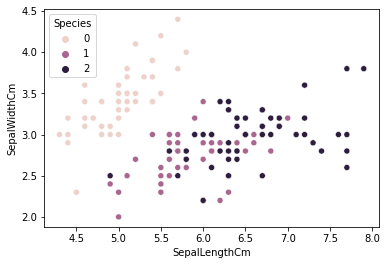

In [285]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

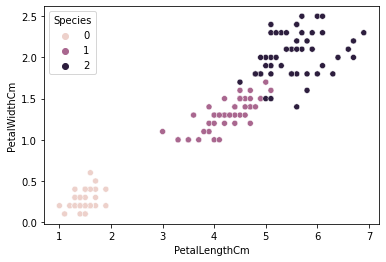

In [286]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')

* Setosa type's petal widths and petal lengths are smaller than the others. But their sepal widths are larger.
* Virginica type's petal widths and petal lengths are bigger than the others.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

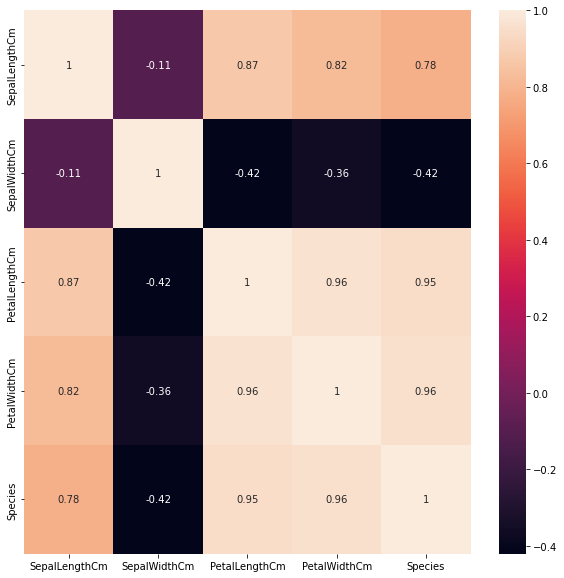

In [287]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 720x720 with 0 Axes>

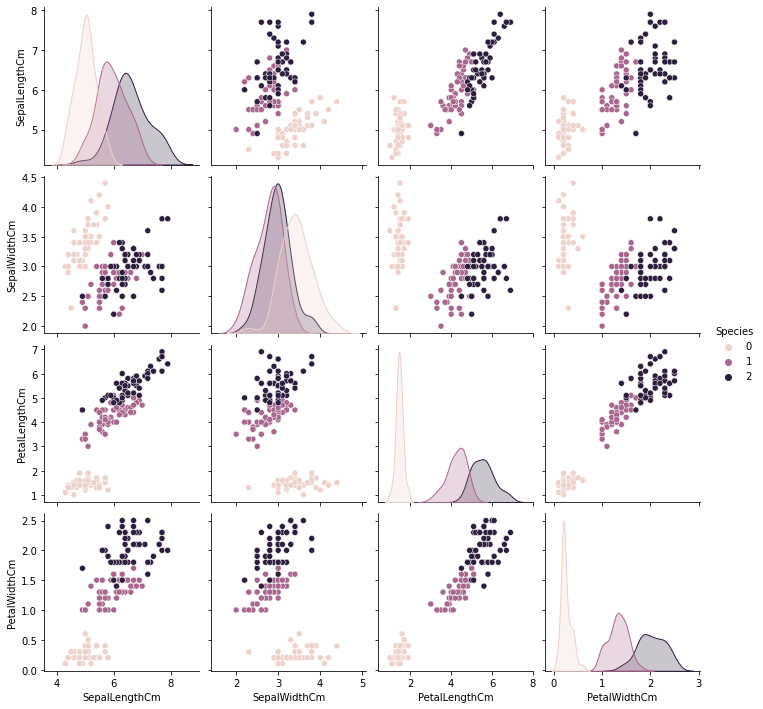

In [288]:
# Pair-plots
plt.figure(figsize=(10,10))
sns.pairplot(df, hue='Species')
plt.plot

# Train the classifier

In [289]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [290]:
X=df.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

### Train The Classifier

In [291]:
clf.fit(X_train_list,y_train_list);

### Predict Class of Test values

In [292]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2]
Prediction
[0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2]
Train Features Expected Classification
[2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2]
Prediction
[2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2]


# Results

### Confusion Matrix of Test

[[ 9  0  0]
 [ 0  6  1]
 [ 0  0 14]]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

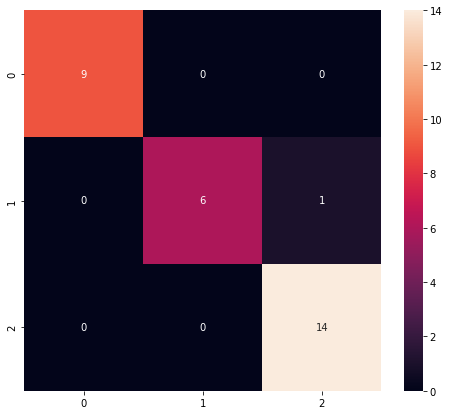

In [293]:
cf_matrix = confusion_matrix(y_test_list, yhat)
print(cf_matrix)

plt.figure(figsize=(8,7))
sns.heatmap(cf_matrix, annot=True)
plt.plot

### Confusion Matrix of Train

[[39  0  0]
 [ 0 43  0]
 [ 0  0 35]]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

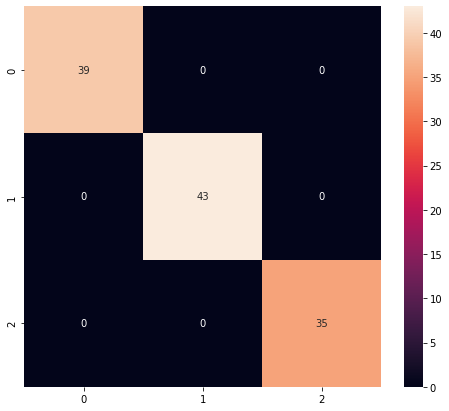

In [294]:
cf_matrix = confusion_matrix(y_train_list, xhat)
print(cf_matrix)

plt.figure(figsize=(8,7))
sns.heatmap(cf_matrix, annot=True)
plt.plot

### F1-Score

In [295]:
print("Test F1 score:")
f1_score(y_test_list, yhat, average='weighted')

Test F1 score:


0.9659593280282935

In [296]:
print("Train F1 score")
f1_score(y_train_list, xhat, average='weighted')

Train F1 score


1.0

### Accuracy

In [297]:
print("Test accuracy:")
accuracy_score(y_test_list, yhat)

Test accuracy:


0.9666666666666667

In [298]:
print("Train accuracy:")
accuracy_score(y_train_list, xhat)

Train accuracy:


1.0

### Precision

In [299]:
print("Test precision:")
precision_score(y_test_list, yhat, average='weighted')

Test precision:


0.9688888888888889

In [300]:
print("Train precision:")
precision_score(y_train_list, xhat, average='weighted')

Train precision:


1.0

### Recall

In [301]:
print("Test precision:")
recall_score(y_test_list, yhat, average='weighted')

Test precision:


0.9666666666666667

In [302]:
print("Train precision:")
recall_score(y_train_list, xhat, average='weighted')

Train precision:


1.0

### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

### Test

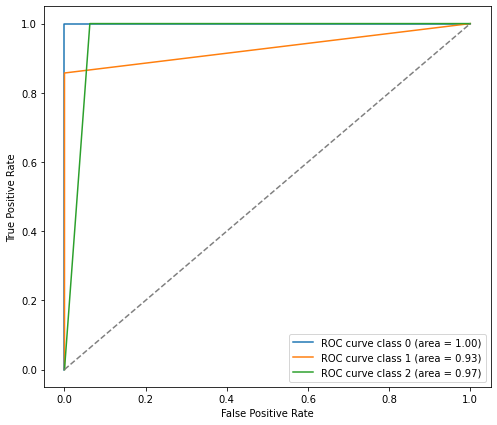

In [303]:
y = np.eye(3)[y_test_list]
predict = np.eye(3)[yhat]

fpr_test = {}
tpr_test = {}
roc_auc_test = {}

for i in range(3):
    fpr_test[i], tpr_test[i], _ = roc_curve(y[:, i], predict[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    
plt.figure(figsize=(8,7))

for i in range(3):
    plt.plot(fpr_test[i], tpr_test[i], 
             label='ROC curve class %d (area = %0.2f)' % (i, roc_auc_test[i]))
    
line_x = [0, 1]
line_y = [0, 1]
plt.plot(line_x, line_y, color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Train

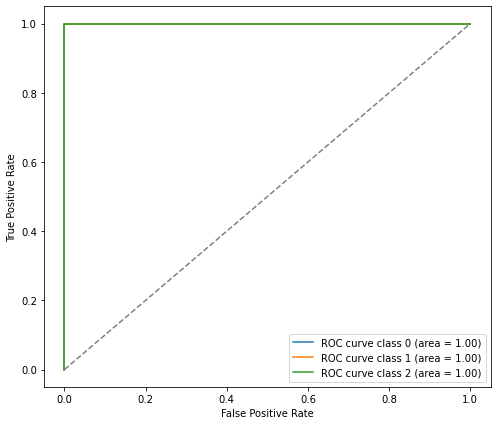

In [304]:
y = np.eye(3)[y_train_list]
predict = np.eye(3)[xhat]

fpr_train = {}
tpr_train = {}
roc_auc_train = {}

for i in range(3):
    fpr_train[i], tpr_train[i], _ = roc_curve(y[:, i], predict[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])
    
plt.figure(figsize=(8,7))

for i in range(3):
    plt.plot(fpr_train[i], tpr_train[i], 
             label='ROC curve class %d (area = %0.2f)' % (i, roc_auc_train[i]))
    
line_x = [0, 1]
line_y = [0, 1]
plt.plot(line_x, line_y, color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### Ideal Depth for DT

In [305]:
L = [1,2,3,4,5,6,7,8,9,10]
dic_acc = {}
dic_prec = {}
for i in L:
    clf2 = DecisionTreeClassifier(max_depth=i)
    clf2.fit(X_train_list,y_train_list)
    yhat = clf2.predict(X_test_list)
    
    dic_acc[i] = accuracy_score(y_test_list, yhat)
    dic_prec[i] = precision_score(y_test_list, yhat, average='weighted', zero_division=0)
    
print("Accuracy:")
for key, value in dic_acc.items():
    print(key, ':', value)
    
print("\nPrecision")
for key, value in dic_prec.items():
    print(key, ':', value)

Accuracy:
1 : 0.5333333333333333
2 : 0.9
3 : 0.9666666666666667
4 : 0.9666666666666667
5 : 0.9666666666666667
6 : 0.9666666666666667
7 : 0.9666666666666667
8 : 0.9666666666666667
9 : 0.9666666666666667
10 : 0.9666666666666667

Precision
1 : 0.3777777777777777
2 : 0.9057692307692308
3 : 0.9688888888888889
4 : 0.9688888888888889
5 : 0.9688888888888889
6 : 0.9688888888888889
7 : 0.9688888888888889
8 : 0.9688888888888889
9 : 0.9688888888888889
10 : 0.9688888888888889


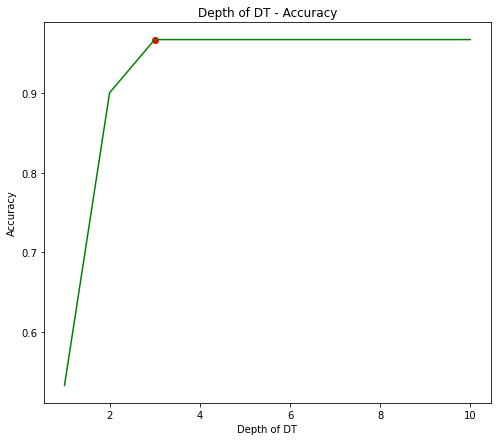

In [306]:
plt.figure(figsize=(8,7))
plt.plot(dic_acc.keys(), dic_acc.values(), color='green')

plt.title("Depth of DT - Accuracy")
plt.xlabel("Depth of DT")
plt.ylabel("Accuracy")

max_x = max(dic_acc, key=dic_acc.get)
max_y = dic_acc[max_x]
plt.scatter(max_x, max_y, color='red', marker='o')

plt.show()

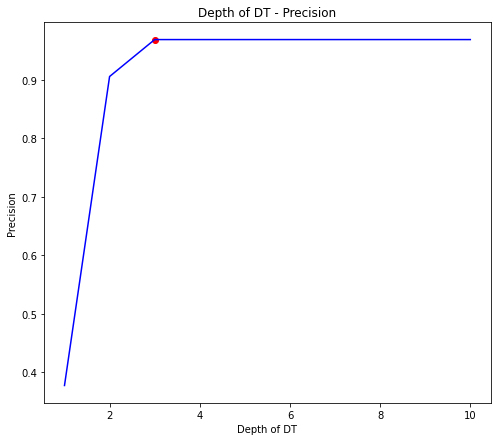

In [307]:
plt.figure(figsize=(8,7))
plt.plot(dic_prec.keys(), dic_prec.values(), color='blue')

plt.title("Depth of DT - Precision")
plt.xlabel("Depth of DT")
plt.ylabel("Precision")

max_x = max(dic_prec, key=dic_prec.get)
max_y = dic_prec[max_x]
plt.scatter(max_x, max_y, color='red', marker='o')

plt.show()